keras

scikit learn



In [51]:
drive_path = r'C:\Apps\temp'

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import os



data = pd.read_csv(r'C:\Apps\temp\bmi_500.csv', index_col = 'Label') #label을 인덱스로 잡는다.
data.info() # 자료의 정보를 보고 결측치 처리를 어떻게 할지 등 미리 생각해야한다.


<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [53]:
data.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [54]:
data.index.unique() # 유일한 값만 보여줌

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [55]:
%pwd

'C:\\Users\\hoins\\ALSCHOOL\\0716목'

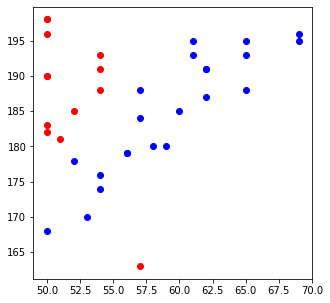

In [56]:
# 각 비만도 등급별로 시각화 (분류가 가능한지 확인하기)
def easy_scatter(label, color):    
    t=data.loc[label]
    plt.scatter(t['Weight'], t['Height'], c = color, label=label)


plt.figure(figsize=(5,5))

t=data.loc['Extremely Weak']
plt.scatter(t['Weight'], t['Height'], c = 'red', label='Extemely Week')

t=data.loc['Weak']
plt.scatter(t['Weight'], t['Height'], c = 'blue')

plt.show()

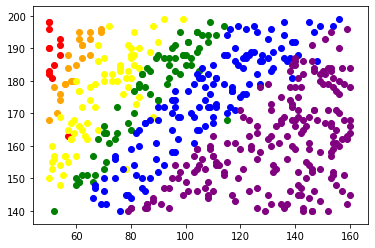

In [59]:
easy_scatter('Extremely Weak', 'red')
easy_scatter('Weak', 'orange')
easy_scatter('Normal', 'yellow')
easy_scatter('Overweight', 'green')
easy_scatter('Obesity', 'blue')
easy_scatter('Extreme Obesity', 'purple')

plt.show()

모델링

1. 문제와 답으로 분리
2. 훈련셋과 평가셋으로 분리
3. 모델생성 및 하이퍼파라미터 조정
4. 학습 및 평가

In [9]:
#비만도 모델 학습
data = pd.read_csv(r'C:\Apps\temp\bmi_500.csv')
data.head()


,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [33]:
x = data.loc[:, 'Height':'Weight'] # location = loc
y = data.loc[:, 'Label']
y

0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 500, dtype: object

In [34]:
print(x.shape)
print(y.shape)

(500, 2)
(500,)


In [35]:
x_train = x.iloc[:350, :] #처음부터 350개 까지의 모든 데이터
x_test = x.iloc[350:,:]
y_train = y.iloc[:350] # 1차원 데이터라 :350으로만 지정해 주면 된다.
y_test = y.iloc[350:]

model = KNeighborsClassifier(n_neighbors = 9)
model.fit(x_train, y_train) #학습을 하는 함수

pre = model.predict(x_test)
metrics.accuracy_score(pre, y_test)

0.9133333333333333

In [36]:
#예측 활용
model.predict([[100,20],[185,43]])

array(['Normal', 'Extremely Weak'], dtype=object)

# 머신러닝 진행과정
1. 문제정의
2. Data colleect(데이터 수집)
3. 데이터 전처리
4. EDA(탐색적 데이터 분석) - 어떤걸 가져와서 분석하는게 좋을지 생각하는 단계
5. 모델 선택, 하이퍼 파라미터 조정
6. 학습
7. 모델 평가


### 지도학습 - KNN

이진분류, 다중분류

회귀
> 연속적인 숫자를 예측

일반화
> 처음보는 데이터를 넣어도 예측이 잘 되는것, 학습이 잘 되어있음.

과대적합
> 너무 많은 특성을 고려하다보니 성능이 낮아지는것
너무 복잡한 모델을 만든것

과소적합
> 모델링을 너무 간단하게 해서 성능이 떨어지는 것
데이터의 다양성을 잡아내지 못하고, 훈련셋에 잘 맞지 않게됨.
최적점을 찾아내는게 좋음
!()[C:\Users\hoins\Desktop\모델복잡도]

### KNN
> 분류, 회귀에 모두 사용가능  
가능하면 K값은 홀수로 놓은 것이 좋다. 짝수면 경계가 애매해질 수 있음.
컴퓨터 성능이 좋을땐 좋음  
확실하고 좋은 데이터가 있을 때는 많이 사용한다.   
데이터가 많아지면 성능이 떨어진다.  
  
> 이웃을 많이 사용하면 복잡도가 낮아진다.
이웃(K)값이 작을수록 복잡도가 증가  
거리를 측정하기 때문에 같은 scale을 같도록 정규화 필요  
훈련 데이터 세트가 크면 (특성, 샘플의 수 증가) 예측이 느려짐.

> 



# 사이킷 런 이용하기

In [37]:
from sklearn.datasets import load_iris

ds = load_iris()
ds

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [39]:
type(ds) # 사이킷 런에 있는 bunch 라는 타입 딕셔너리와 비슷

sklearn.utils.Bunch

In [40]:
ds.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [48]:
print(ds.target_names) # .으로 써도 되고 아래처럼 배열 형식으로 써도 된다.
print(ds['feature_names']) #ds는 dataset의 약자
print(ds.data.shape)
print(ds.target.shape)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)
(150,)
